# Lecture 5: Data Visualization, October 3, 2022

## Outline
- ### Comments about Workshop 5
- ### Quiz
    - the purpose of this is to see your level of coding five weeks into the semester. 
    - the quiz is also used as an attendance check
    - Four problems in 15 minutes. Totally open-book, but you should work on them independently. 
- ### Visualization
- ### Pandas (time permits)
        


# Follow-up on WS05 problem 4

## Collison Animation
Let's watch an animation of proton proton collision 

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/5xcw7sU_jkg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Collider Coordinate System
The coordinate system of a collider experiment is defined as follows.

The beam direction, the direction of the incoming colliding particles, is corresponding to the z axis. The x and y axes define a plane that is perpendicular to the beam direction (z axis). The x-y plane is referred to as the transverse plane, in the sense that it is transverse to beam direciton. 

In a polar coordinate system, one could define the polar angle $\theta$ and the azimuthal angle $\phi$. The polar angle would the angle between the direction of flight of a particle and the beam direction. The azimuthal angle is the angle between the projection of a particle's direction onto the transverse plane and the x-axis. 

These coordinates are illustrated in the sketch below. 

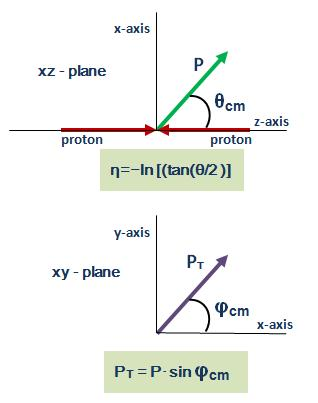



The polar coordinate system provides a different way of presenting the kinematic information of the particle energy and momentum (also referred to as the four momentum).

In the D'Carte coordinate system, we have 
$(E,\vec{p}) = (E, p_x, p_y, p_z)$

In the polar coordinate system, we have
$(E, \vec{p}) = (E, p_T, \theta, \phi)$

where we have 
- $p_T = \sqrt{ p_x^2 + p_y^2}$

- $\phi = arccos(p_x/p), $ if $ y > 0 $ ; $ \phi = 2\pi - arccos(p_x/p), $ if $ y \leq 0 $

- $\theta = arccos(p_z/p)$

$(E, p_x, p_y, p_z)$ and $(E, p_T, \theta, \phi)$ are two representations of the same information possessed by $(E,\vec{p})$, and they are fully equivalent. 

In particle physics data analysis, we replace $\theta$ by $\mathrm{log_e}(\frac{\theta}{2})$. This quantity is referred to as the pseudo-rapidity ($\eta$).  The reason behind replacing $\theta$ by $\eta$ is beyond the scope of this course. If you are interested in this, take Physics 129! This said, since we replaced $\theta$ by $\eta = \mathrm{log_e}(\frac{\theta}{2})$, one can still say that the information is the same between $(E, p_x, p_y, p_z)$ and 
$(E, p_T, \eta, \phi)$. To summarize, we can derive $(E, p_T, \eta, \phi)$ from $(E, p_x, p_y, p_z)$, using the following relations

- $p_T = \sqrt{ p_x^2 + p_y^2}$

- $\phi = arccos(p_x/p), $ if $ y > 0 $ ; $ \phi = 2\pi - arccos(p_x/p), $ if $ y \leq 0 $

- $\eta = \mathrm{log_e}(\frac{\theta}{2})$
    - $\theta = arccos(p_z/p)$


Based on these relations, we can also derive $(E, p_x, p_y, p_z)$ from $(E, p_T, \eta, \phi)$:

- $p_x = p_T cos(\phi)$

- $p_y = p_T sin(\phi)$
 
- $p_z = p_T sinh(\eta)$


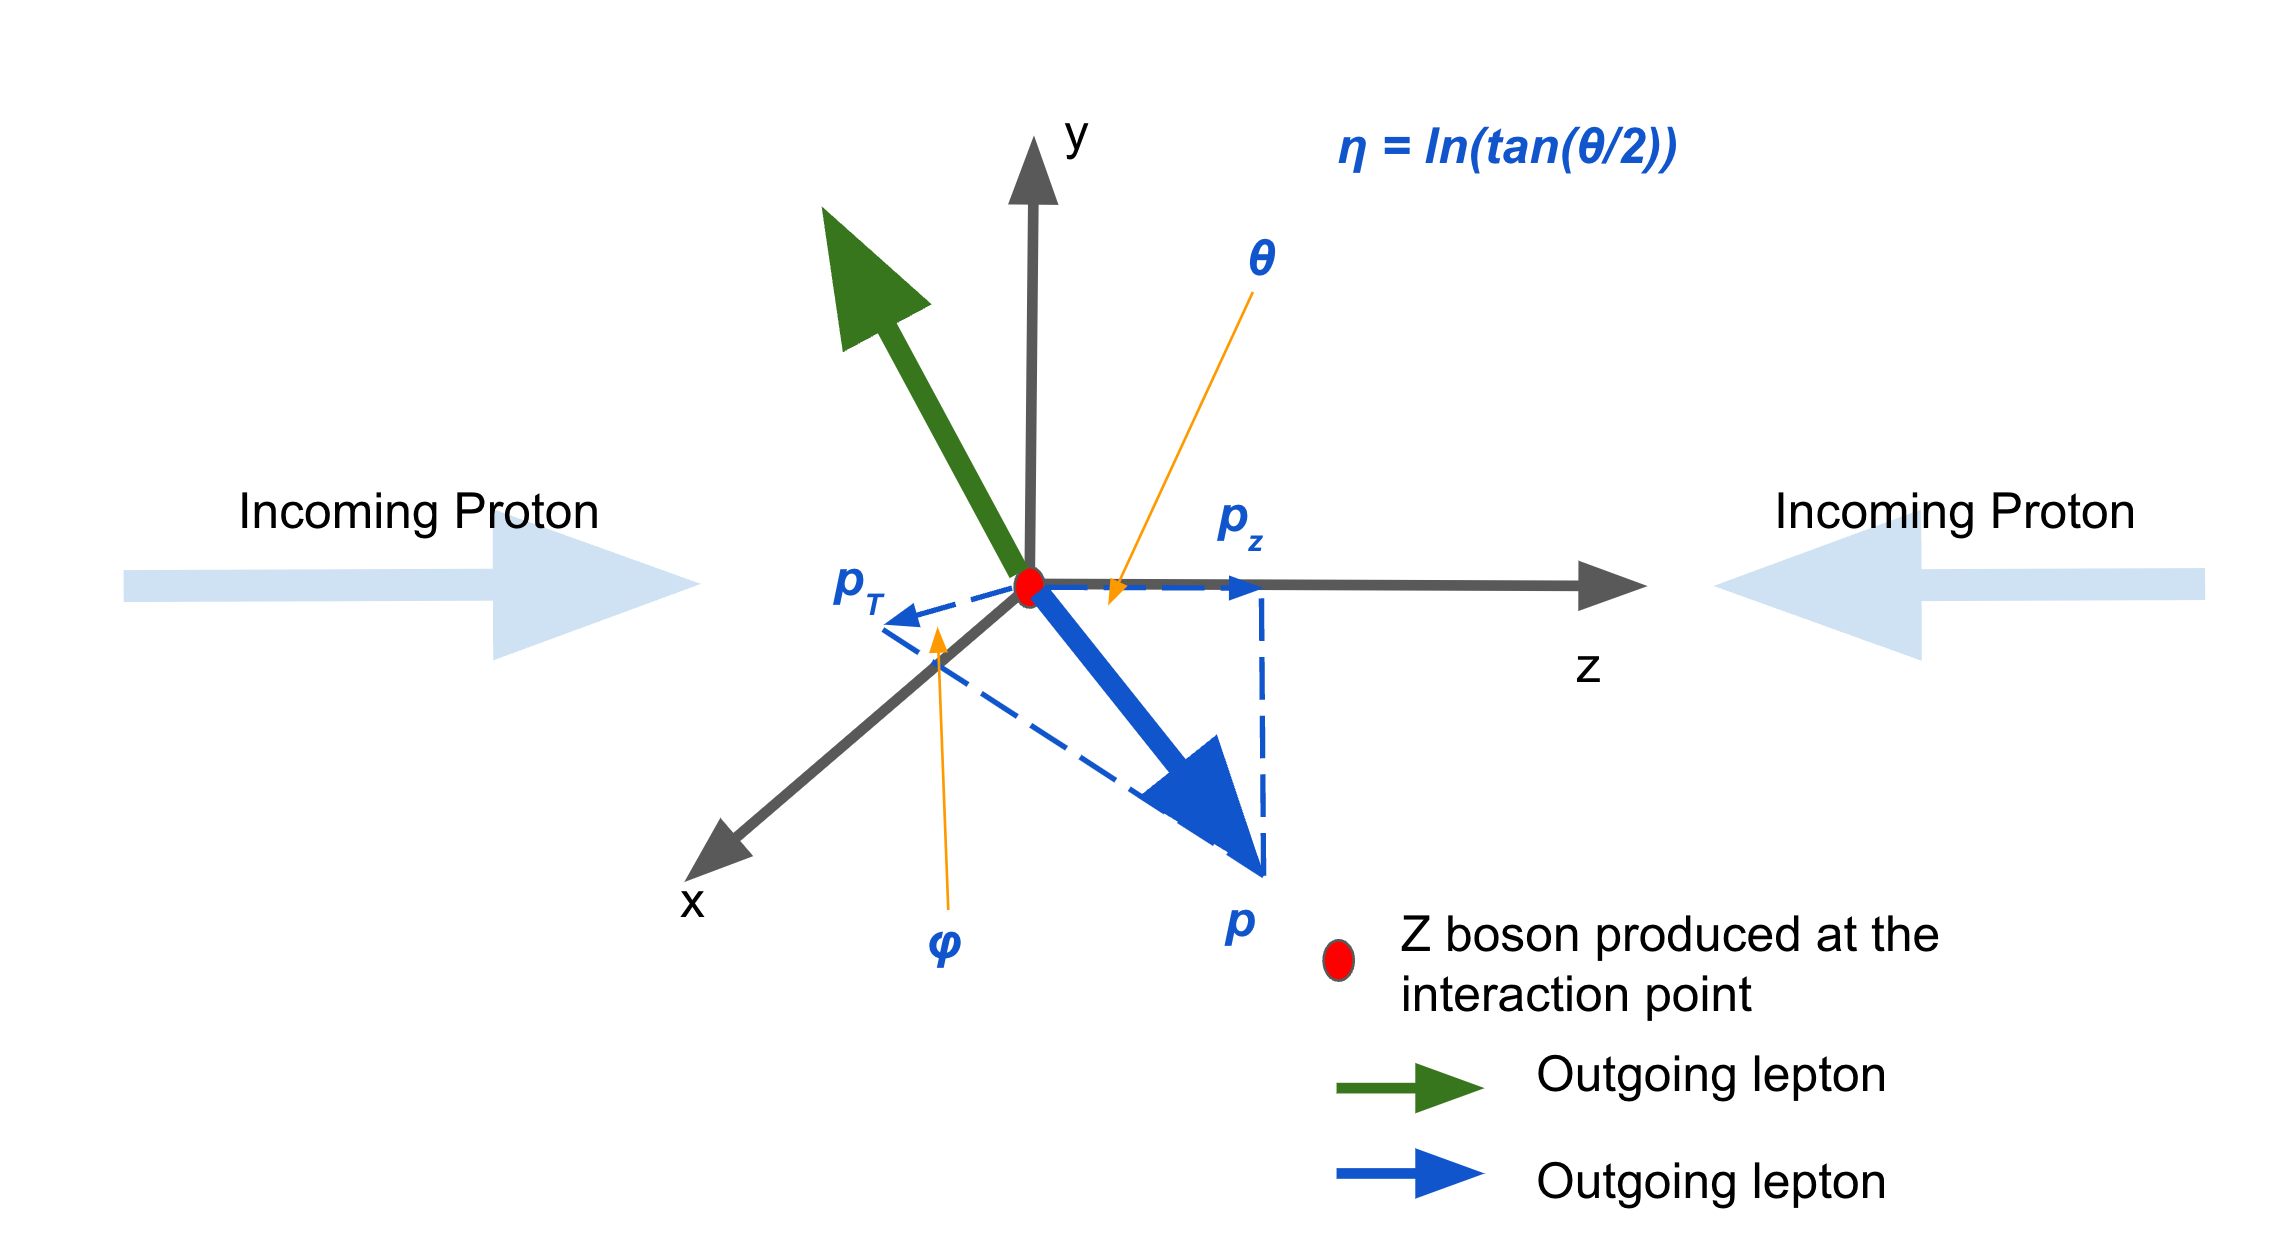

## Typical problems


### Complication in vector sum implementation

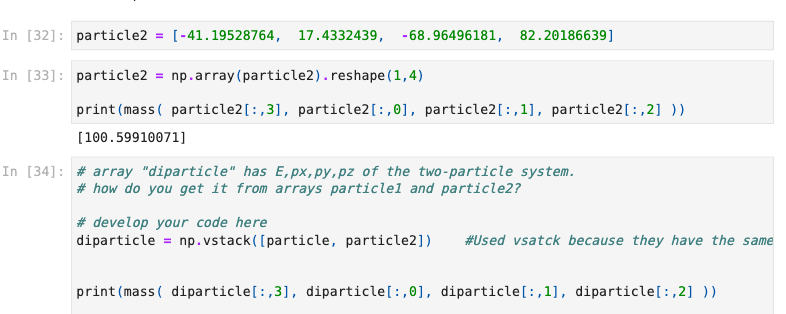


The numpy array operations are performed element-wise. The array particle has four entries, corresponding to E, px, py, pz. If you want to get the sum of two particles' four-momenta, simply do - diparticle = particle + particle2 

### Definition of phi function

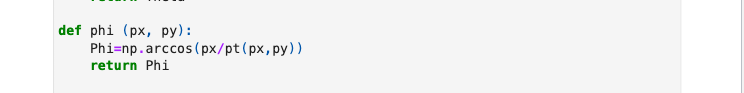

### Functions not being numpy friendly
 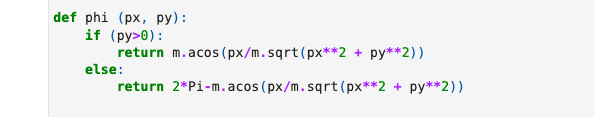
 
See the counter-example below

In [ ]:
a = np.array([1,2,3])
def printout(a):
    if a > 1:
        print(a)
        
printout(a)

Visualization lecture starts here

# Introduction

In this lecture, we will discuss how to visualize data in ways that help us interpreting it, establishing conclusions, and commumunicating our conclusions, messages, and interpretations, effectively, to our audience.

## Remark on the technical implementation

**In this notebook, the examples are all made with the Matplotlib package. However, you may choose whatever packages you are familiar with to make your plots. This said, our lecture emphasizes the basic rules of producing data visualization that are effective in communicating scientific results; no matter what technical solution you choose, you must be able to realize these conceptual requirements specified by our course.**

Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

We will go over only a few examples. Documentation and examples are available at https://matplotlib.org/ . In particular, my favorite -- examples: https://matplotlib.org/stable/gallery/index.html(make sure to cite in your code)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Example
Let's start with an example taken from HW03. In HW3, the last problem deals with a sample of collision events where two leptons are produced. Each lepton has its momentum and energy measured. The projections of the momentum of a lepton onto the three spatial dimensions are known: $p = (p_x , p_y , p_z)$. We want to visualize the relation of the $p_x$ components from the two leptons that are in the same collision events and understand if there is a correlation between them. 

In [ ]:
data = np.loadtxt('Zmumu.csv', delimiter = ',', skiprows=1)
px1 = data[:,0]
px2 = data[:,5]
plt.scatter(px1,px2)
plt.xlabel('Lepton 1 $p_{x}$ [GeV]')
plt.ylabel('Lepton 2 $p_{x}$ [GeV]')

The scatter method of matplotlib.pyplot is a simple way to visualize two-dimensional data. However, the plot geenrated out of box is often not presented in a format that's intuitive and easy for us to understand the relation of data plotted on the x and y axes. 

**first, we adjust the aspect ratio of the plot**

In [ ]:
px1 = data[:,0]
px2 = data[:,5]
plt.scatter(px1,px2)
plt.xlabel('Lepton 1 $p_{x}$ [GeV]')
plt.ylabel('Lepton 2 $p_{x}$ [GeV]')
plt.gca().set_aspect('equal') # changing the aspect ratio to 1:1


**second, we `zoom in` the core of the distribution and leave out the entries at the tail (the outliers)**

- we calculate the mean and standard deviation of x and y and then reset the range of the axis to (mean - 3std , mean + 3std) 

In [ ]:
std1 , std2 = px1.std() , px2.std()
mean1 , mean2 = px1.mean() , px2.mean()
plt.scatter(px1,px2)
plt.xlabel('Lepton 1 $p_{x}$ [GeV]')
plt.ylabel('Lepton 2 $p_{x}$ [GeV]')
plt.xlim( ( mean1 - 3*std1 , mean1 + 3*std1 ))
plt.ylim( ( mean2 - 3*std2 , mean2 + 3*std2 ))
plt.gca().set_aspect('equal') # changing the aspect ratio to 1:1

There seems to be a discernible correlation as the points are aligned along the anti-diagnoal direction. But the density of the entries is hard to see. 
**To address the question of densitiy, we use a 2-D histogram to draw the 2-D data points**
- the x and y axes are corresponding to the 2 quantities
- axes are binned
- each bin corresponds to a cell that's defined by an interval in x and an interval in y
- the brigther the cell, the more entries in that cell

In [ ]:
plt.hist2d(px1,px2,bins=[20,20], range = [ [mean1 - 3*std1 , mean1 + 3*std1], [mean2 - 3*std2 , mean2 + 3*std2]])
plt.xlabel('Lepton 1 $p_{x}$ [GeV]')
plt.ylabel('Lepton 2 $p_{x}$ [GeV]')
plt.xlim( ( mean1 - 3*std1 , mean1 + 3*std1 ))
plt.ylim( ( mean2 - 3*std2 , mean2 + 3*std2 ))
plt.gca().set_aspect('equal') # changing the aspect ratio to 1:1

**To knonw the absolute scale of the cell entry, we add a color scale to the side of the 2D histogram**

In [ ]:
plt.hist2d(px1,px2,bins=[20,20], range = [ [mean1 - 3*std1 , mean1 + 3*std1], [mean2 - 3*std2 , mean2 + 3*std2]])
plt.xlabel('Lepton 1 $p_{x}$ [GeV]')
plt.ylabel('Lepton 2 $p_{x}$ [GeV]')
plt.xlim( ( mean1 - 3*std1 , mean1 + 3*std1 ))
plt.ylim( ( mean2 - 3*std2 , mean2 + 3*std2 ))
plt.colorbar()
plt.gca().set_aspect('equal') # changing the aspect ratio to 1:1

**Now that we have a very intuitive understanding of the relation between these two quantities, how about a more quantitative one?**
- Let's calculate the pearson correlation between the $p_x$ of lepton 1 and $p_x$ of lepton 2

In [ ]:
def correlation(x, y):
    mean_x , mean_y , std_x , std_y = x.mean(), y.mean() , x.std() , y.std()
    
    denom = len(x) * std_x * std_y
    numer = (( x - mean_x)*(y - mean_y)).sum()
    return  numer/denom

In [ ]:
correlation(px1,px2)

In [ ]:
correlation(px1,px1)

In [ ]:
correlation(px1,-px1)

# Graph


## Critical elements in a scientific plot
- **Labels**: x and y axes have labels indicating their corresponding variables. Units of the variable must be shown unless the variable is dimensionless (i.e., without a unit). 
- **Line style over color**: the use of different line styles to visualize different entries is preferred. Using different colors to differentiate entries are fine but not ideal (not friendly to color blind people, or not as distinguishable when printed.)
- **Legend**: every entry is explained in the legend so that the plot is "self-contained", i.e., people can understand much of the plot without referring to text or caption of the plot.
- **Residual or ratio panel**: when multiple entries (points, curves, distributions) are shown in a plot, the purpose is always to have a comparison. Unless the entries are totally different, it is always a good idea to visualize the difference between entries. In this example, the different between the black dots (observed data) and the red dashed line is important, and as such, a residual panel is attached. The residual is defined as data - Bkg (red dashed line). We will see shortly in other cases a ratio panel could be useful too. 
- **Ohter labels** that provide information helping people to understand the plots.


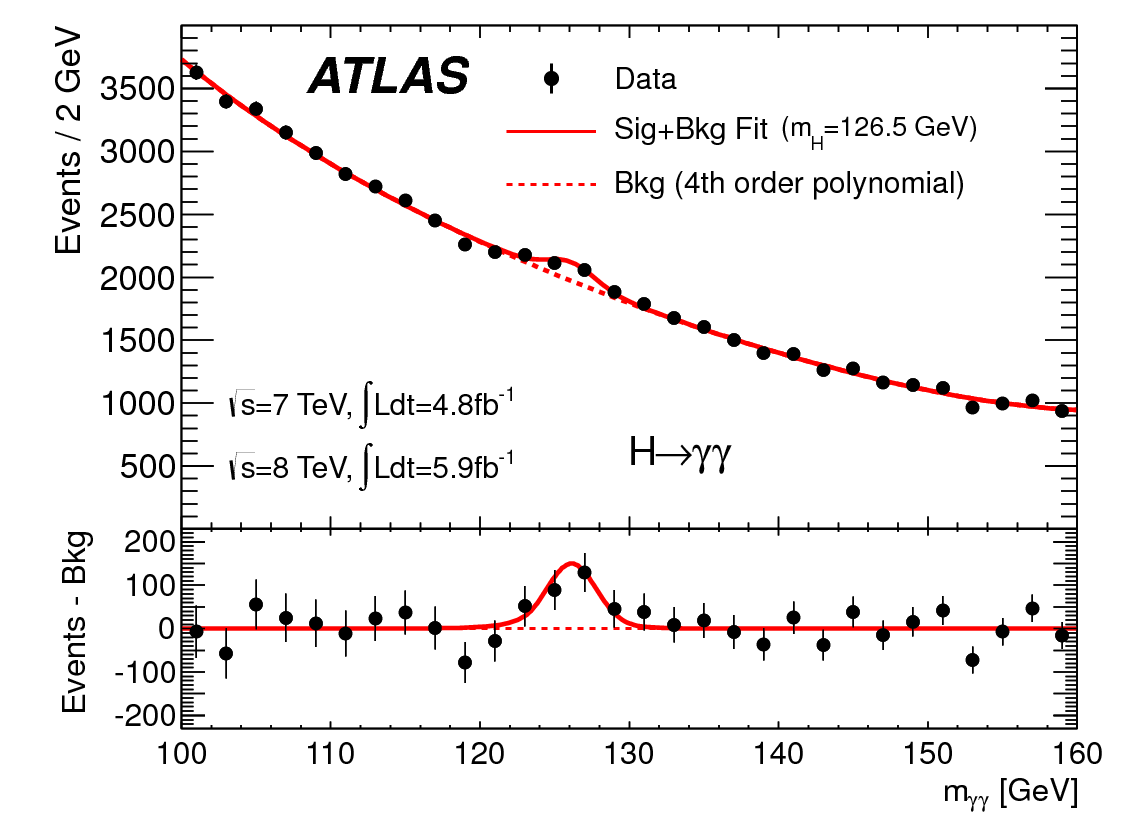

## As a reference, Matplotlib.pylot rendering 
The plot above was created with CERN's data analysis software ROOT, which has an extensive suite of tools for data visualization. Below is my attempt to render something that looks like the official plot with methods available in `matplotlib.pyplot`. You can use my scripts as a reference.
- **An incomplete list of what you should learn from this example**  
    - how to set titles/lables of the x and y axes
    - how position the titles/labels of the x and y axes
    - how to change the fontsize for various text entries in this plot, including title, legend, text labels
    - how to create a two-panel plot
    - how to change the size of the subplots
    - how to remove borders of a legend box
    - how to position the legend
    - how to change the marker style and its size
    - how to change colors of line and marker
    - how to change the style of marker
    ...

In [ ]:
count = np.loadtxt("DataCount1.csv",delimiter=',')
fit = np.loadtxt("Fitvalue.csv",delimiter=',')

myy = np.linspace(103,157,28)
fittedcount = np.interp(myy,fit[:,0],fit[:,1],period=5000)


In [ ]:
fig, axs = plt.subplots(2,1,figsize=(8,6), gridspec_kw={'height_ratios': [3, 1]})

markerstyle = 'o' # note the different ways marker styles are set for plt.scatter and plt.errorbar
markercolor = 'black'

markersize = 100

plt.subplot(211)
plt.plot(myy,fittedcount,color='red', linewidth=2.5, label='Background fit')

plt.scatter(myy,count[:,1],color=markercolor,marker=markerstyle, s = markersize, label='Data')
plt.xlim(102,158)
plt.ylim(0,4000)
plt.ylabel('Events/2 GeV',horizontalalignment='right',y=1.0, fontsize=20)

plt.text( 115,3300,'ATLAS',fontsize=24, style='italic', weight='bold')
plt.text( 105,1000,'$\sqrt{s} = 7$ TeV, $\int{Ldt}=$4.8 fb$^{-1}$',fontsize=20)
plt.text( 105,500,'$\sqrt{s} = 8$ TeV, $\int{Ldt}=$5.9 fb$^{-1}$',fontsize=20)
plt.text( 135,550, r'$H \rightarrow \gamma\gamma$',fontsize=20)


plt.legend(borderpad=3,fontsize=20,frameon=False, loc='upper right')

plt.subplot(212)
plt.scatter(myy,count[:,1]-fittedcount,color=markercolor,marker=markerstyle,s = markersize)
plt.ylim(-200,200)
plt.xlim(102,158)
plt.xlabel('$m_{\gamma\gamma}$ [GeV]')


residual = count[:,1]-fittedcount
centers = np.linspace(103,157,28)
error = np.sqrt(count[:,1])
plt.errorbar(centers, residual, yerr=error, fmt=markerstyle,color=markercolor)
plt.plot([103,157],[1,1],color='red',linestyle='dashed')
plt.xlim(102,158)
plt.xlabel('$m_{\gamma\gamma}$ [GeV]', horizontalalignment='right',x=1.0, fontsize=20)
plt.ylabel('Events-Bkg', fontsize = 20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)


#### Marker reference 

https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
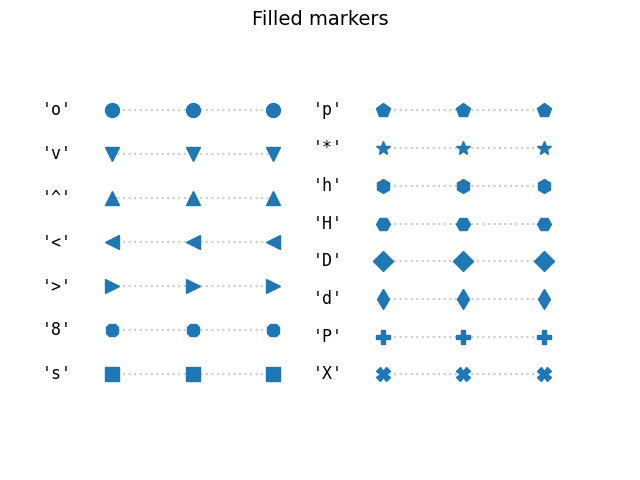


#### legend
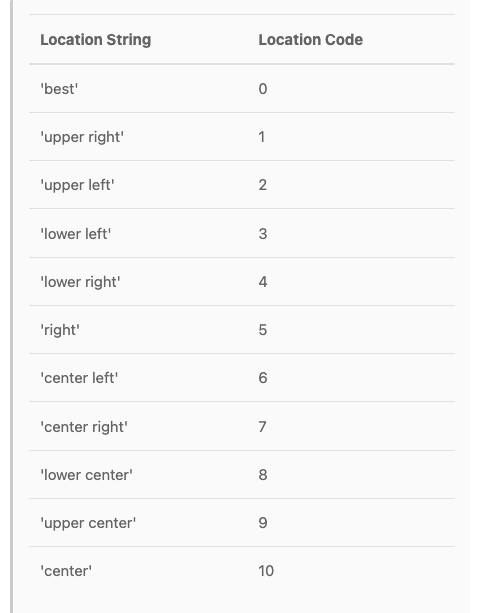

# Histogram
an excerpt from Wikipedia https://en.wikipedia.org/wiki/Histogram

A histogram is an approximate representation of the distribution of numerical data. The term was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size.


An example of dilepton mass distribution from proton-proton collision data collected by the ATLAS experiment at CERN's Large Hadron Collider.
- Basic elements of this histogram
    - data histogram is shown with black markers with a shape of 'o', i.e., closed circle
    - a range of $m_{\mu\mu}$ between 46 GeV and 200 GeV
    - a uniform binning, with 77 bins and bin widths of 2 GeV
    - The y axis shows the number of entries in each bin (hence the /2GeV label)
- other remarkable elements
    - the data histogram is compared to a stack of other histograms that are generated from computer simulation
    - the bottom panel is a `ratio plot`, meaning that the entries are data divided by the simulation (labeled as prediction in the plot). 

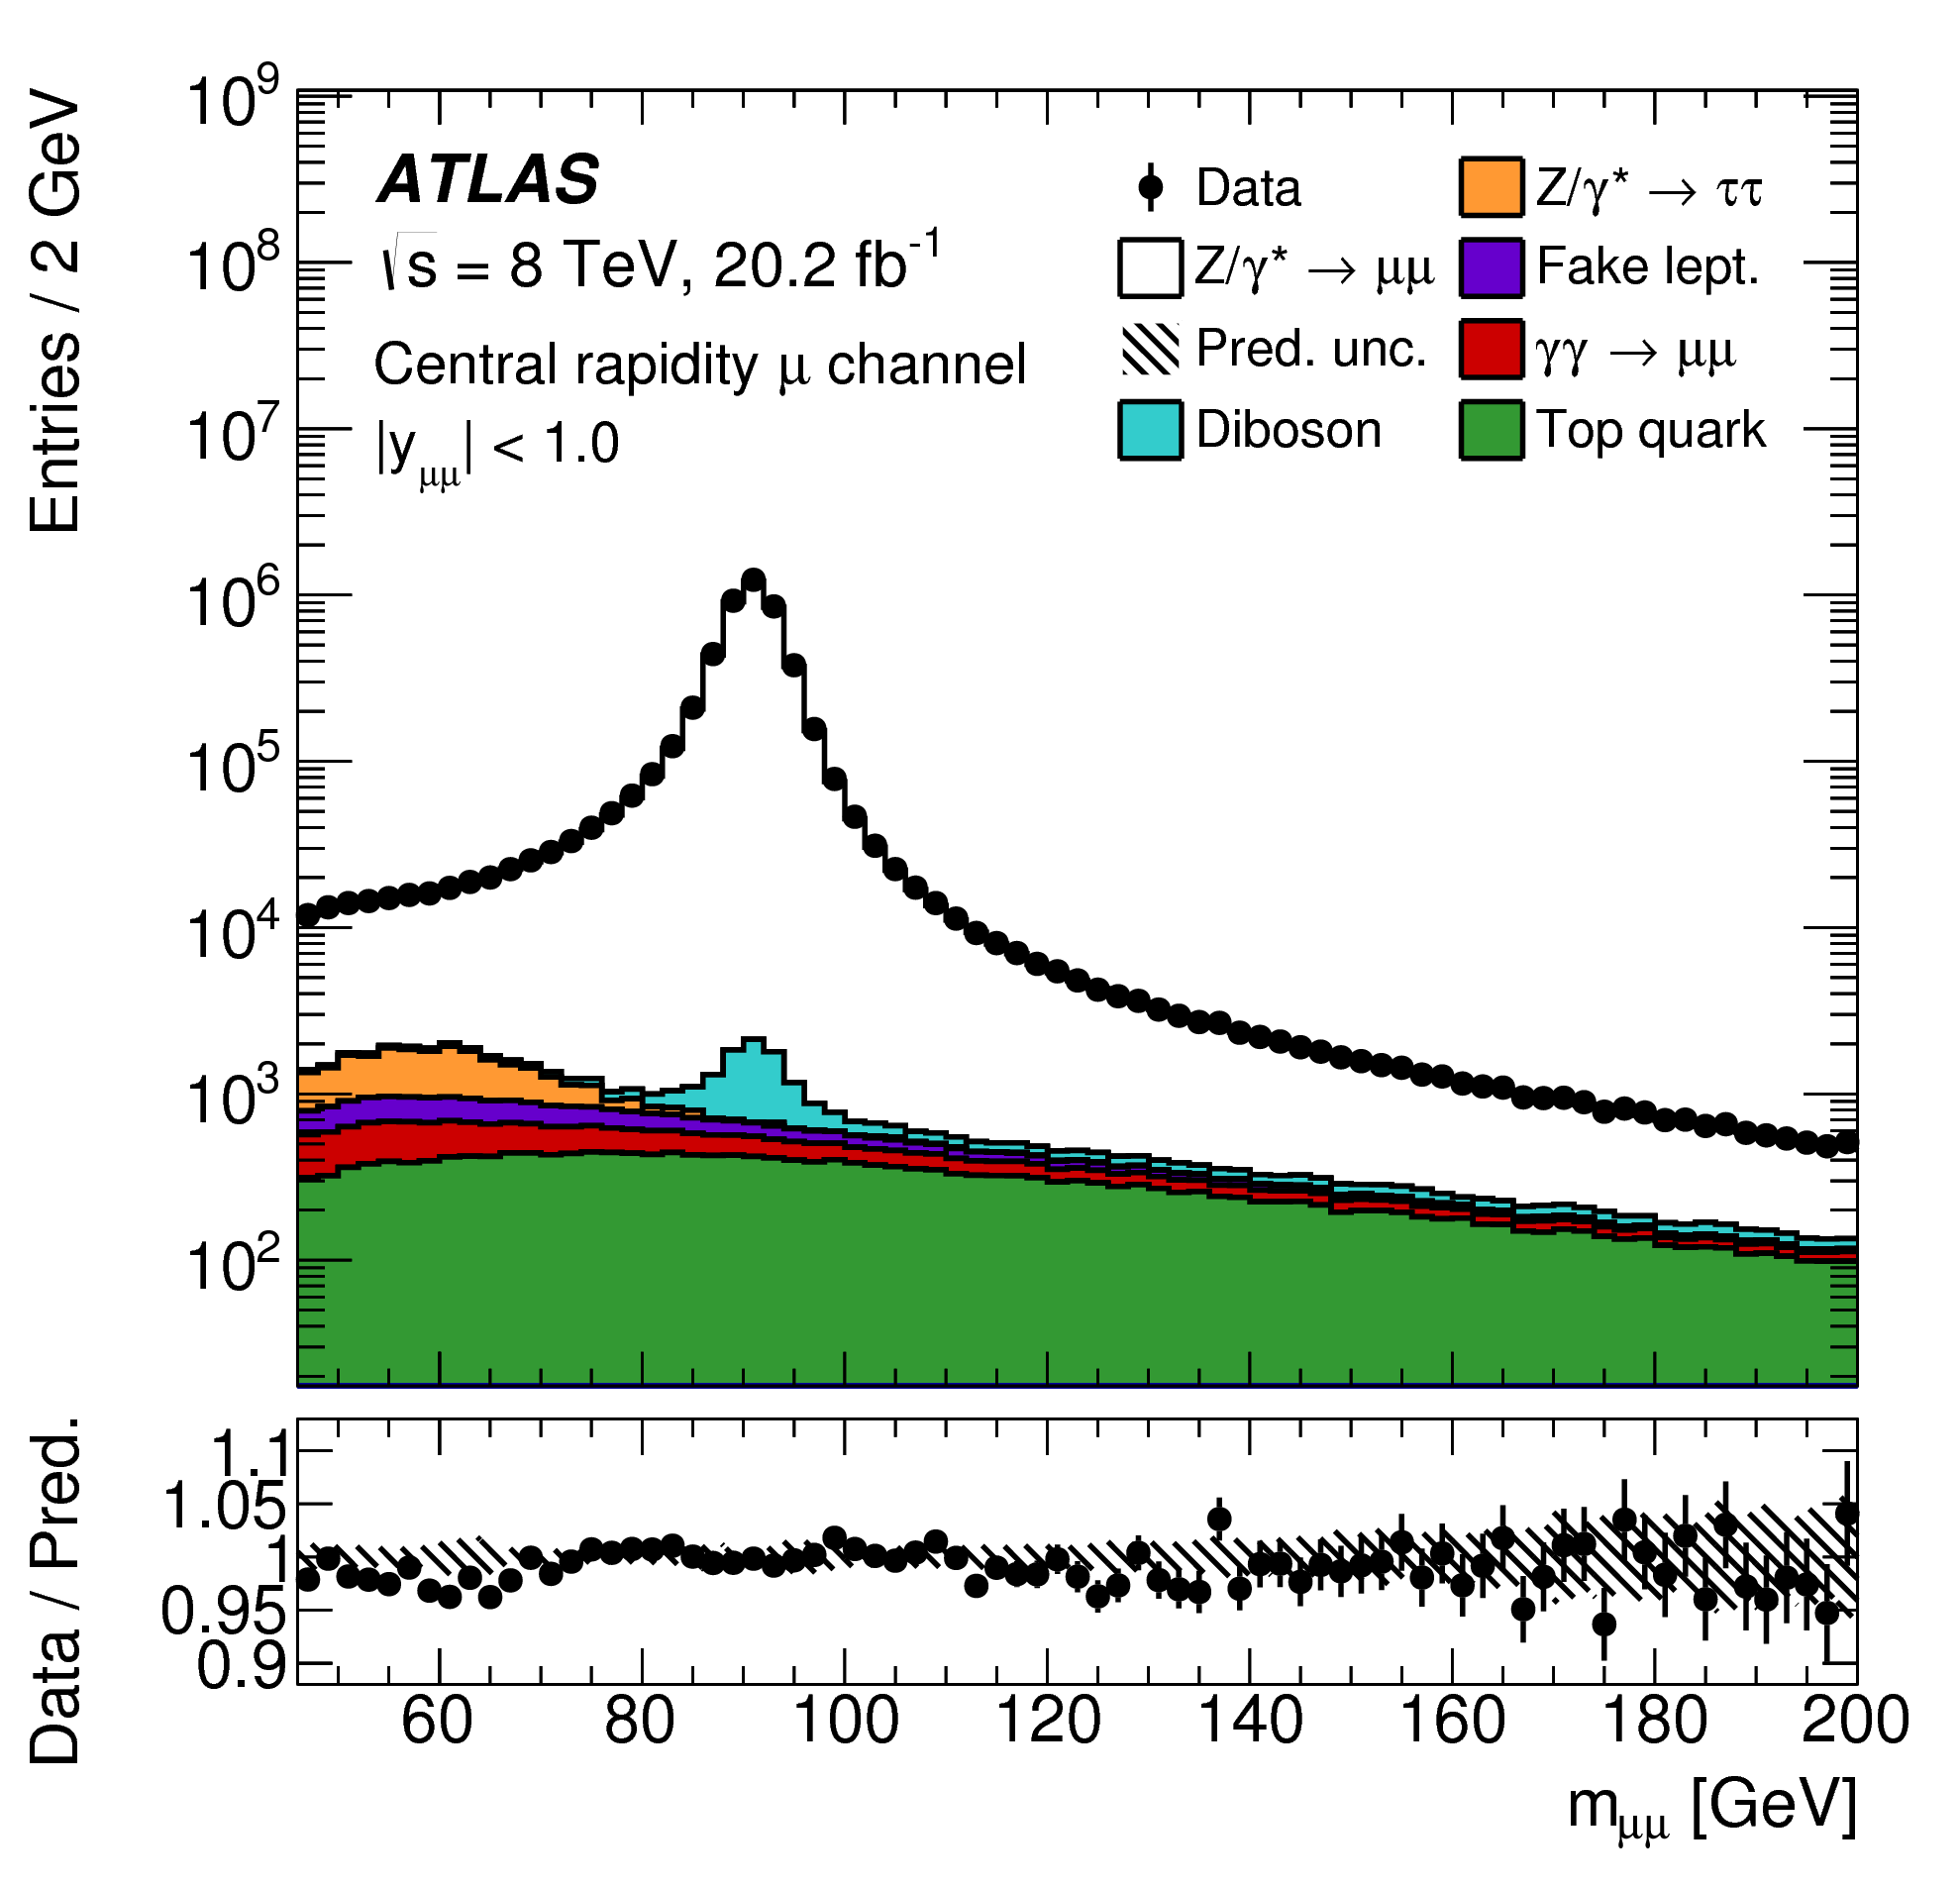

## Basics: data, binning, range, histogram styles, colors

Let's look at a simple example to see how basic components of a histogram are implemented or configured

- Line styles
    https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
- Histogram types
    https://matplotlib.org/stable/gallery/statistics/histogram_histtypes.html
- Line Color
    https://matplotlib.org/stable/tutorials/colors/colors.html


In [ ]:
# Generate a sample of data points that follow a Gaussian distribution with a mean of 125 and a width of 2
np.random.seed(0)
var = np.random.normal(125,2,size=5000000)

In [ ]:
styles = ['stepfilled', 'step']

# You should understand what these arguments do
plt.hist(var,bins=40,range=(115,135), histtype=styles[1], color='red')
plt.xlabel('var')
plt.ylabel('Number of Entries')

In [ ]:
styles = ['stepfilled', 'step']

# You should understand what these arguments do
plt.hist(var,bins=40,range=(115,135), histtype=styles[1], color='red', linestyle='dashed')
plt.xlabel('var')
plt.ylabel('Number of Entries')

## Retrieve histogram information: bin contents (count), bin edges (boundaries)
Ourdata was originally stored in a numpy array of shape (5000000,). Once a histogram is made, the data sample is defined by bin counts and bin edges. These are returning objects from plt.hist 

In [ ]:
bincount, binedges, others = plt.hist(var,bins=40,range=(115,135), histtype='step', color='red')
print(bincount, binedges, others)
plt.xlabel('var')
plt.ylabel('Number of Entries')

## Variable binning
- sometimes it is useful to define histograms with non-uniform binning (aka variable binning) 
    - bin edges are given in an array

**Note that the plot we generated below shows exactly the same distribution as the one earlier in the notebook (with all entries), and it is just the binning that's changed**


In [ ]:
varbins = np.array([115, 120, 122, 123, 123.5, 124, 124.25, 124.5, 124.75, 125, 125.25, 125.5, 125.75, 126, 126.5, 127, 128, 130, 135])
print(varbins)


plt.hist(var,bins=varbins, histtype='step', color='red')
#plt.yscale('log')
plt.xlabel('var')
plt.ylabel('Number of Entries')

## Uncertainty visualization: error bars

In measurmeent, we always deal with uncertainties and it is important to visualize the uncertainties of the measurmement.
- in this example, we will take a subset of the generated data (5000 entries) and draw its distribution and error bars.
- the uncertainty must be calculated separately ( which is not so desirable)
- uncertainties are shown as error bars, which are implemented via plt.errorbar method

In [ ]:
# use var[1:501] to extract 500 entries from the original var array
bincount, binedges, others = plt.hist(var[1:501],bins=40,range=(115,135), histtype='step', color='red')


# bin centers are always the mid points between the two consecutive entries of bin edges
bincenters = (binedges[0:-1] + binedges[1:])/2.0

#the line below is not universally applicable, however, in this case, it is fine
errors = np.sqrt(bincount)


plt.hist(var[1:501],bins=40,range=(115,135), histtype='step', color='red', label='A subset')
plt.errorbar( bincenters, bincount, yerr=errors, fmt='o',markersize=1, color='red' , label = 'Statistical uncertainties')
plt.xlabel('var')
plt.ylabel('Number of Entries')
plt.legend()

## Normalization of distributions
**now let's come back to the random data sample `var`**
- let's take two subsets of data points from this sample
    - sub set 1 data entries between 1000 and 5000
    - sub set 2 data entries bewteen 30000 and 50000

In [ ]:
var1 , var2 = var[1000:5000] , var[30000:50000]

In [ ]:
plt.hist(var1, bins = 40, range=(115,135), histtype = 'step', color = 'red', label= 'Subset 1')
plt.hist(var2, bins = 40, range=(115,135), histtype = 'step', color = 'blue', label= 'Subset 2')
plt.xlabel('var')
plt.ylabel('Number of Entries')
plt.legend()

## How to normalize distributions and make shape comparisons

since the two subsets have different number of entries, their `normalization`s are not comparable. Here, the term `normalization` refers to the total number of entries of the subset, or in the histogram, the area of the histogram. 

We know how the sample was generated (by drawing random numbers from a normal distribtuion with a mean of 125 and a sigma of 2), and we expect the `shapes` of these two distributions should be consistent.

How do we comapare their shapes? We need to normalize these distributions to the same area. This can be done with the density option in the numpy.hist method.
    - when density option is turned on, the histogram is normalized so that each bin's content represents the fraction of its contribution to the total content of the histogram. In other words, the total area under the histogram sums up to 1. We often call this operation as 
###    **normalize the histogram to 1**.

In [ ]:
plt.hist(var1, bins = 40, range=(115,135), histtype = 'step', color = 'red', label= 'Subset 1', density=True)
plt.hist(var2, bins = 40, range=(115,135), histtype = 'step', color = 'blue', label= 'Subset 2',density=True)
plt.xlabel('var')
plt.ylabel('Fraction of Entries')
plt.text(114,0.175,'Both distributions \n are normalized to 1', fontsize=15)
plt.legend()

### Normalize to the same area
To do a shape comparison, we only need to make the two histograms having the same area. The area doesn't have to be 1. Often, we noramlize one histogram to another. This means we normalize the area under the histogram of histogram A to that of histogram B.

In [ ]:
weight = var1.size/var2.size
#Create an array to store weights of each entry
# the weight array must have a shape the same as var2 shape, 
#because each data point in var2 needs to have a weight in the weightarray
weightarray = np.ones_like(var2)*weight
plt.hist(var1, bins = 40, range=(115,135), histtype = 'step', color = 'red', label= 'Subset 1' )
plt.hist(var2, bins = 40, range=(115,135), histtype = 'step', color = 'blue', label= 'Renormalized Subset 2',weights=weightarray)
plt.xlabel('var')
plt.ylabel('Number of Entries')
plt.legend()
plt.text(114,350,'Blue dist. normalized \n to have the same \n area as the red', fontsize=15)


## Highlight the difference 
### Ratio Panel
In the above example, the blue and red histograms look very similar. A more quantitative comparison could be done by produceing a ratio plot of the two distributions. 
- in each bin, the ratio of the bin content of histogram A (blue) to the bin content of histogram B (red) can be calculated
- the calculated ratio values can be displayed in a separate plot, as a histogram
- the subpanels of the same plot can be created using the subplot method of matplotlib.pyplot

In [ ]:
plt.subplot(2,1,1)

weight = var1.size/var2.size
#Create an array to store weights of each entry
# the weight array must have a shape the same as var2 shape, 
#because each data point in var2 needs to have a weight in the weightarray
weightarray = np.ones_like(var2)*weight
bincount1, bin1, others1 = plt.hist(var1, bins = 40, range=(115,135), histtype = 'step', color = 'red', label= 'Subset 1' )
bincount2, bin2, others2 = plt.hist(var2, bins = 40, range=(115,135), histtype = 'step', color = 'blue', label= 'Renormalized Subset 2',weights=weightarray)
plt.xlabel('var')
plt.ylabel('Number of Entries')
plt.legend()
plt.xlim(115,135)

plt.subplot(2,1,2)
ratio = bincount1 / bincount2
xentries = bincenters
plt.hist(xentries, bins=40, range=(115,135),histtype='step',color='red', label='Red/blue',weights = ratio)
plt.plot([115,135],[1,1], color='black',linestyle='dashed')
plt.xlim(115,135)
plt.ylim(0,2)
plt.ylabel('Ratio')


#### More on the creation of the ratio histogram

- we show the ratio using the histogram method, out of technical reasons
- the ratio values are just a sequence of values 
- In this line: `plt.hist(xentries, bins=40, range=(115,135),histtype='step',color='red', label='Red/blue',weights = ratio)`
    - the input data points are xentries, which is a series of values corresponding to bin centers. 
    - by giving xentries to the hist() method, you would get a uniform distribution between 115 and 135 with one entry in each bin
    - to adjust the content of each bin so that it would match the ratio value, we specify the `weights` of the histogram to be numpy array ratio. The array objects `ratio` and `xentries` have the same shape, and the hist() method associates them and assign the value of ratio as the bin content to the bin specified by xentries. 


### Residual Panel

Sometimes, it may make sense to take the difference between two distributions. The difference is often referred to as the `residual`.

- the technical implementation is very similar to that of the ratio plot
- we can retrieve the bin contents of the two histograms from plt.hist
- then we calculate the difference between them, aka the residual.
- we pass the residual array to the histogram as the weights

In [ ]:
plt.subplot(2,1,1)

weight = var1.size/var2.size
#Create an array to store weights of each entry
# the weight array must have a shape the same as var2 shape, 
#because each data point in var2 needs to have a weight in the weightarray
weightarray = np.ones_like(var2)*weight
bincount1, bin1, others1 = plt.hist(var1, bins = 40, range=(115,135), histtype = 'step', color = 'red', label= 'Subset 1' )
bincount2, bin2, others2 = plt.hist(var2, bins = 40, range=(115,135), histtype = 'step', color = 'blue', label= 'Reweighted Subset 2',weights=weightarray)
plt.xlabel('var')
plt.ylabel('Number of Entries')
plt.legend()
plt.xlim(115,135)

plt.subplot(2,1,2)

residual = bincount1 - bincount2 

xentries = bincenters
plt.hist(xentries, bins=40, range=(115,135),histtype='step',color='red', label='Red - blue',weights = residual)
plt.plot([115,135],[1,1], color='black',linestyle='dashed')
plt.xlim(115,135)
plt.ylim(residual.min()*1.5, residual.max()*1.5)
plt.ylabel('Residual')




### Adjusting the sizes of the two panels
Often the residual panel or ratio panel is just an auxilliary part of the part. We need them but we don't need to be taking much too much space. We can adjust the relative size of the two panels.

In [ ]:
# Adjust parameters in this line below and see what it does to the figure
fig, axs = plt.subplots(2,1,figsize=(6,4), gridspec_kw={'height_ratios': [3, 1]})


plt.subplot(2,1,1)

weight = var1.size/var2.size
#Create an array to store weights of each entry
# the weight array must have a shape the same as var2 shape, 
#because each data point in var2 needs to have a weight in the weightarray
weightarray = np.ones_like(var2)*weight
bincount1, bin1, others1 = plt.hist(var1, bins = 40, range=(115,135), histtype = 'step', color = 'red', label= 'Subset 1' )
bincount2, bin2, others2 = plt.hist(var2, bins = 40, range=(115,135), histtype = 'step', color = 'blue', label= 'Reweighted Subset 2',weights=weightarray)
plt.xlabel('var')
plt.ylabel('Number of Entries')
plt.legend()
plt.xlim(115,135)

plt.subplot(2,1,2)

residual = bincount1 - bincount2 

xentries = bincenters
plt.hist(xentries, bins=40, range=(115,135),histtype='step',color='red', label='Red - blue',weights = residual)
plt.plot([115,135],[1,1], color='black',linestyle='dashed')
plt.xlim(115,135)
plt.ylim(residual.min()*1.5, residual.max()*1.5)
plt.ylabel('Residual')
plt.xlabel('var')


# Pandas intro

## Motivation

- so far, we've been memorizing the position of variable in axes to keep track of many different varaibles
- naturally, one would ask why can't we have some headers
- we will add the header for `columns` and `rows` 
- let's see what happens

In [ ]:
# Some lines of code to get the array we need
# We went through these lines last week
a2c = {8515767.0: 'Brazil', 2780400.0: 'Argentina', 1285216.0: 'Peru', 1141748.0: 'Colombia', 1098581.0: 'Bolivia', 916445.0: 'Venezuela', 756096.0: 'Chile', 406752.0: 'Paraguay', 276841.0: 'Ecuador', 214969.0: 'Guyana', 176215.0: 'Uruguay', 163820.0: 'Suriname'}


area_country = np.array(list(a2c.items()))
# what do we have in area_country?
print(area_country)

# only take the 2nd entry of axis1
area_country = area_country[:,1].reshape(12,1)
print(area_country.shape)

cdata = np.loadtxt('compiled_data.csv',delimiter=',')
GDPpc = 1e6 * cdata[:,0]/cdata[:,2]
GDPpc=GDPpc.reshape(12,1)
print(cdata.shape, GDPpc.shape)
newdatav2 = np.hstack((cdata, GDPpc))
newdatav2 = np.hstack((area_country, newdatav2))

print(newdatav2)
print(newdatav2.shape)

##### adding header to `columns`

In [ ]:
header = np.array(['country','GDP','Capital Population','Population','Area', 'GDP per capita'])


In [ ]:
newdatav2 = np.vstack((header,newdatav2))


### Numpy arrays with headers for columns and rows
- after the country name array was stacked to data array, all data entries turn to string type
    - not so ideal
    - data structures such as pandas handle these scenarios quite well 

In [ ]:
print(newdatav2)

## Pandas data frame

- just like the ndarray object to numpy array, pandas' basic data structure is called a `data frame`
- we'll see some simple operations with dataframes
- first, let's write our numpy array hosted data to a csv file

### write our Numpy array to a csv file

In [ ]:
# let's write this complex array to a csv file
np.savetxt('SAdata.csv', newdatav2, delimiter = ',', fmt = '%s')

In [ ]:
%ls -ltr SAdata.csv
%cat SAdata.csv

### Pandas:  import data from csv and tabulate


In [ ]:
import pandas as pd

df = pd.read_csv('SAdata.csv')
print(df)

In [ ]:
# or even nicer
df

### Retrieve a single column

In [ ]:
print(df['GDP per capita'])

In [ ]:
df['GDP'].head()

In [ ]:
df['GDP'].head(6)

In [ ]:
# what is the type of this?
type(df['GDP'])

In [ ]:
df['GDP per area'] = df['GDP'] *1e6 / df['Area']
# let's what happens to the dataframe after this

In [ ]:
df

In [ ]:
df.info()
# which gives you a summary of data contained in the DataFrame

In [ ]:
df[['GDP per capita','Area']]

In [ ]:
df[['GDP per capita','Area']].median()

In [ ]:
subdf = df[['GDP per capita','Area']]

print(subdf.mean())
type(subdf.mean())